<span style="font-size: 28px; color: blue;">Costa Denison-George</span>

My Final Exam is based on the 'Heart Patient Dataset', and has 2 parts.

Part 1 analyzes and visualize the Heart Patients Dataset to see what countries and continents have a risk of patients having a heart attack based on their gender, and age brackets.

Part 2 proves some of the results of an article published in 2019 on ‘10 things that increase your risk of a heart attack’ based on the data given in the Heart Patients Dataset.

<span style="font-size: 40px; text-align: center; font-weight: bold">PART 1</span>

<span style="font-size: 25px; text-align: center;">Cleaning the data</span>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Uploading the dataset
df = pd.read_excel('C:\\Users\\rdeni\\Desktop\\heart_dataset.xlsx', sheet_name = 'heart_dataset')

In [4]:
#assigning age brackets for easier grouping
def age_bracket(age):
    if 18 <= age <= 36:
        return '(18 - 36)'
    elif 37 <= age <= 54:
        return '(37 - 54)'
    elif 55 <= age <= 72:
        return '(55 - 72)'
    elif 73 <= age <= 90:
        return '(73 - 90)'
    else:
        return 'Unknown'

In [5]:
#adding AgeBracket column to dataset
df['AgeBracket'] = df['Age'].apply(age_bracket)

In [6]:
#uploading sheet 3
geo_code = pd.read_excel('C:\\Users\\rdeni\\Desktop\\heart_dataset.xlsx', sheet_name = 'geo_code')

In [7]:
#joining country description from the 'geo_code' sheet to the main sheet
df1 = pd.merge(df, geo_code, on='Country_CD', how='right')

In [8]:
#dropping extra columns
df1.drop(columns=['Unnamed: 2', 'Continent_CD_y', 'Continent', 'Unnamed: 5', 'Hemisphere_CD_y', 'Hemisphere'], inplace=True)

In [9]:
df1.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country_CD,Continent_CD_x,Hemisphere_CD_x,Heart Attack Risk,AgeBracket,Country
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,1,6,S,0,(55 - 72),Argentina
1,BSV5917,29,Female,201,134/60,86,0,0,0,1,...,33.787685,785,0,10,1,6,S,0,(18 - 36),Argentina
2,SIQ8677,39,Male,326,155/104,47,1,0,1,0,...,22.545418,468,2,8,1,6,S,1,(37 - 54),Argentina
3,KTU2333,80,Male,268,100/69,102,1,1,1,1,...,29.609678,485,2,7,1,6,S,0,(73 - 90),Argentina
4,ZBC0359,76,Male,133,91/83,93,0,0,1,1,...,27.221721,563,1,10,1,6,S,0,(73 - 90),Argentina


<span style="font-size: 40px; text-align: center; font-weight: bold">101</span>

<span style="font-size: 25px; text-align: center;">What is the correlation between age and countries for patients who have a high risk of heart attack?</span>

<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 1</span>

In [10]:
#filtering the dataset to a specific age bracket
AgeBracket1 = df1['AgeBracket'] == '(18 - 36)'

selected_columns = ['Heart Attack Risk', 'Country',]

#Applying the filter and selecting specific columns
result = df1.loc[AgeBracket1, selected_columns]

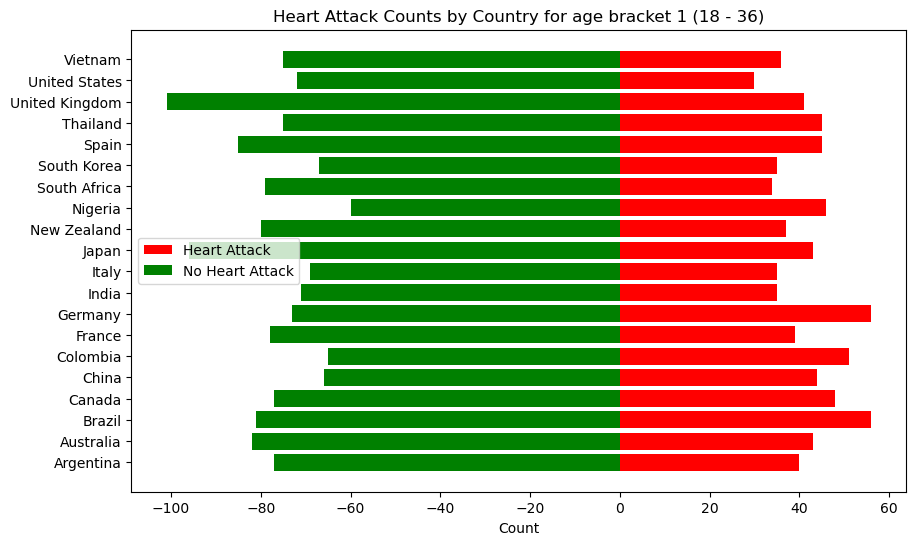

In [11]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data = result[result['Heart Attack Risk'] == 1]
no_heart_attack_data = result[result['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts = heart_attack_data['Country'].value_counts().sort_index()
no_heart_attack_counts = no_heart_attack_data['Country'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts.index, heart_attack_counts, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts.index, -no_heart_attack_counts, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Country for age bracket 1 (18 - 36)')
ax.legend()

plt.show()

The graph above shows the number of patients in each country, between ages 18 and 36 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all countries, there are more people without a risk of heart attack than there are in this age bracket.

2, Germany and Brazil lead other countries in terms of people within the ages 18 and 36 that have a high risk of a heart attack.

3, The United Kingdom has the least amount of patients between ages 18 and 36 with a risk of having a heart attack. 

<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 2</span>

In [12]:
#filtering the dataset to a specific age bracket
AgeBracket2 = df1['AgeBracket'] == '(37 - 54)'

selected_columns = ['Heart Attack Risk', 'Country']

#Applying the filter and selecting specific columns
result2 = df1.loc[AgeBracket2, selected_columns]

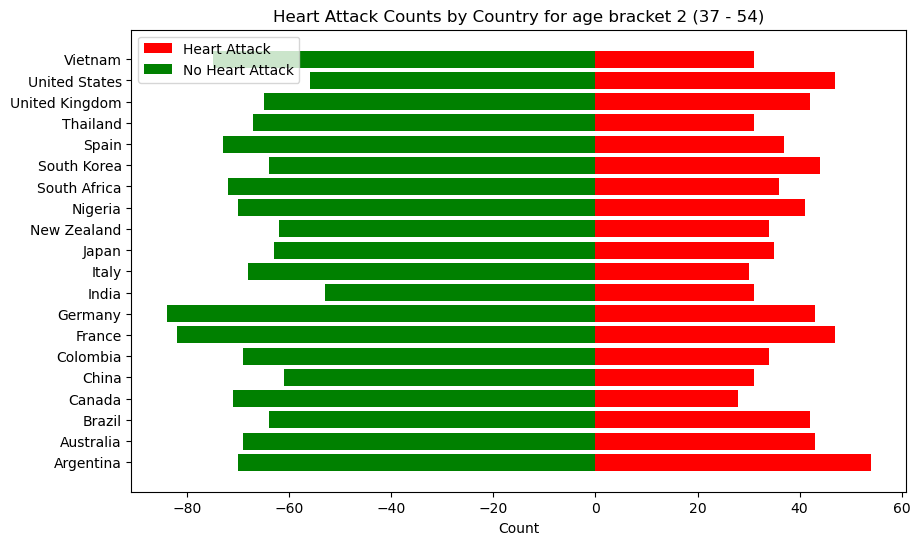

In [15]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data = result2[result2['Heart Attack Risk'] == 1]
no_heart_attack_data = result2[result2['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts = heart_attack_data['Country'].value_counts().sort_index()
no_heart_attack_counts = no_heart_attack_data['Country'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts.index, heart_attack_counts, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts.index, -no_heart_attack_counts, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Country for age bracket 2 (37 - 54)')
ax.legend()

plt.show()

The graph above shows the number of patients in each country, between ages 37 and 52 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all countries, there are more people without a risk of heart attack than there are in this age bracket.

2, Argentina,The United States, and France lead other countries in terms of people within the ages 37 and 52 that have a high risk of a heart attack.

3, Germany and France, despite also having relatively high number of patients with a high risk of getting a heart attack also has the least amount of patients between ages 37 and 52 with a risk of having a heart attack. 

<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 3</span>

In [13]:
#filtering the dataset to a specific age bracket
AgeBracket3 = df1['AgeBracket'] == '(55 - 72)'

selected_columns = ['Heart Attack Risk', 'Country']

#Applying the filter and selecting specific columns
result3 = df1.loc[AgeBracket3, selected_columns]

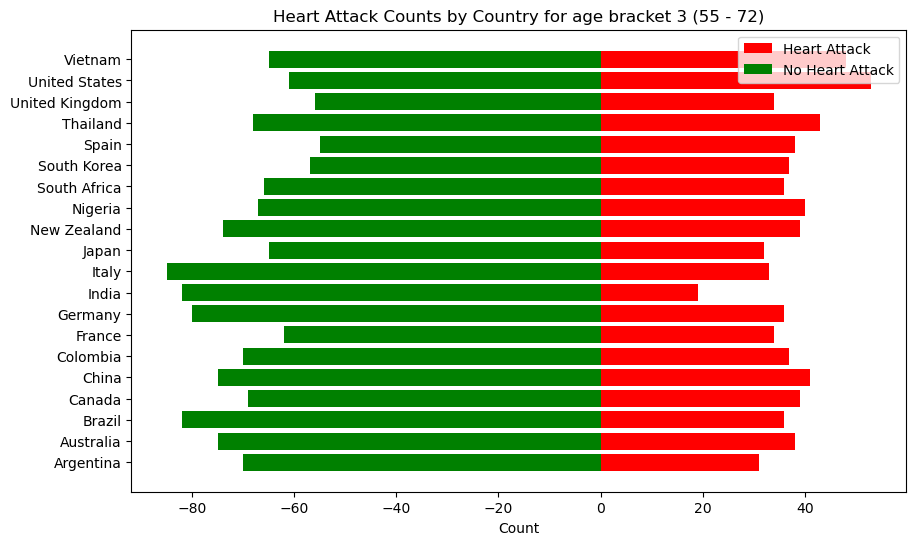

In [16]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data = result3[result3['Heart Attack Risk'] == 1]
no_heart_attack_data = result3[result3['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts = heart_attack_data['Country'].value_counts().sort_index()
no_heart_attack_counts = no_heart_attack_data['Country'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts.index, heart_attack_counts, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts.index, -no_heart_attack_counts, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Country for age bracket 3 (55 - 72)')
ax.legend()

plt.show()

The graph above shows the number of patients in each country, between ages 55 and 72 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all countries, there are more people without a risk of heart attack than there are in this age bracket.

2, The United States and Vietnam lead other countries in terms of people within the ages 55 and 72 that have a high risk of a heart attack.

3, Italy and Brazil has the least amount of patients between ages 55 and 72 with a risk of having a heart attack. 

<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 4</span>

In [14]:
#filtering the dataset to a specific age bracket
AgeBracket4 = df1['AgeBracket'] == '(73 - 90)'

selected_columns = ['Heart Attack Risk', 'Country']

#Applying the filter and selecting specific columns
result4 = df1.loc[AgeBracket4, selected_columns]

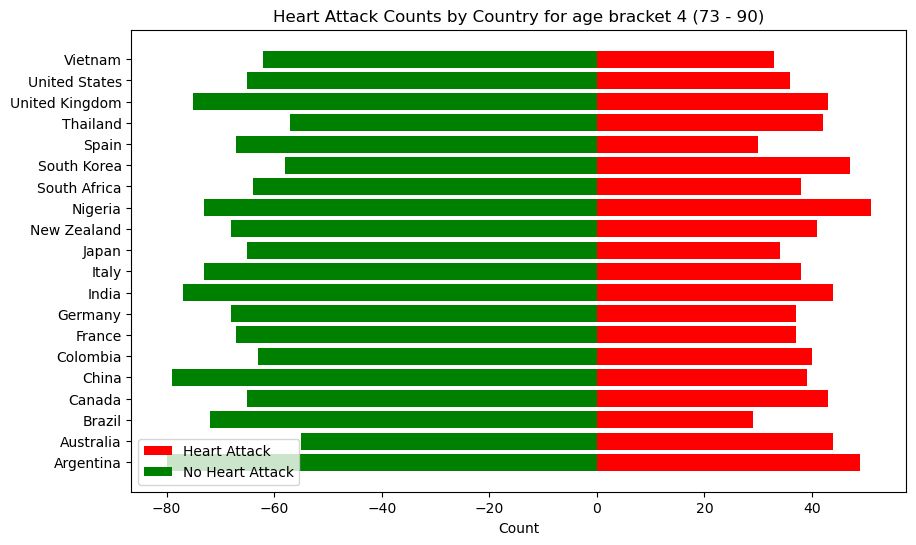

In [17]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data = result4[result4['Heart Attack Risk'] == 1]
no_heart_attack_data = result4[result4['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts = heart_attack_data['Country'].value_counts().sort_index()
no_heart_attack_counts = no_heart_attack_data['Country'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts.index, heart_attack_counts, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts.index, -no_heart_attack_counts, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Country for age bracket 4 (73 - 90)')
ax.legend()

plt.show()

The graph above shows the number of patients in each country, between ages 73 and 90 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all countries, there are more people without a risk of heart attack than there are in this age bracket.

2, Nigeria, Argentina and South Korea lead other countries in terms of people within the ages 73 and 90 that have a high risk of a heart attack.

3, China and Argentina has the least amount of patients between ages 73 and 90 with a risk of having a heart attack. 

Visualizing the data to show which countries have a high risk of heart attack based on different age groups shows that for each age group, a different country has the highest amount.
Only Argentina and The United States appear twice as at least one of the top 3 countries with patients that have a high risk of a heart attack in different age groups.

This begs the question 'What country, out of all patients in all age groups have the highest number of patients with a high risk of a heart attack?

To answer this, we write code to analyze and visualize the number of patients with a risk of heart attack in every country.

In [18]:
#filter just positives
filtered_df = result[result['Heart Attack Risk'] == 1]
filtered_df2 = result2[result2['Heart Attack Risk'] == 1]
filtered_df3 = result3[result3['Heart Attack Risk'] == 1]
filtered_df4 = result4[result4['Heart Attack Risk'] == 1]

In [19]:
combined_df = pd.concat([filtered_df, filtered_df2, filtered_df3, filtered_df4], ignore_index=True)

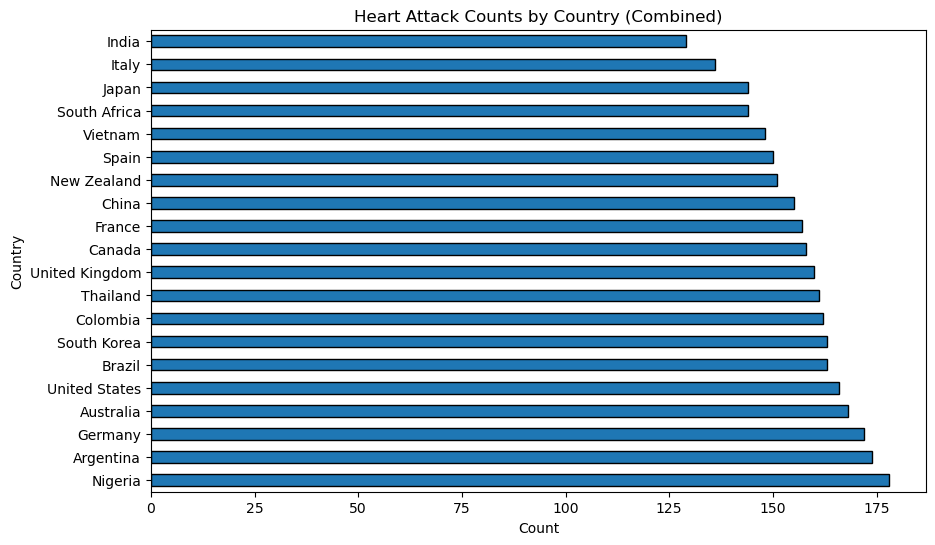

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
combined_df['Country'].value_counts().plot(kind='barh', ax=ax, edgecolor='black')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Country')
ax.set_title('Heart Attack Counts by Country (Combined)')

plt.show()

Here, we see that the country with the highest number of patients with a heart attack is Nigeria(I wonder why).
The data also shows that the results we get when we aggregate the data is comparable with the results we get when we visualize the data based on 4 different age groups.

Interestingly, the top 5 countries with the highest number of patients with a risk of having a heart attack are from 5 different parts of the world.

Nigeria is in Africa,

Argentina is in South America,

Germany is in Europe,

Australia is...Australia. It is it's own continent,

The United States is North America.

This makes me curious to see what continent has the highest number of patients with a high risk of a heart attack.

<span style="font-size: 40px; text-align: center; font-weight: bold">102</span>

<span style="font-size: 25px; text-align: center;">What is the correlation between age and continents for patients who have a high risk of heart attack?</span>

<span style="font-size: 25px; text-align: center;">Cleaning the data</span>

In [21]:
#joining continents
df102 = pd.merge(df, geo_code, on='Continent_CD', how='right')

In [22]:
#dropping extra columns
df102.drop(columns=['Unnamed: 2', 'Country_CD_y', 'Country', 'Unnamed: 5', 'Hemisphere_CD_y', 'Hemisphere'], inplace=True)

In [23]:
df102.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country_CD_x,Continent_CD,Hemisphere_CD_x,Heart Attack Risk,AgeBracket,Continent
0,SOH9843,22.0,Male,398.0,174/93,82.0,1.0,1.0,1.0,0.0,...,39.413213,327.0,3.0,6.0,13.0,1.0,N,1.0,(18 - 36),Africa
1,CQM6221,69.0,Male,250.0,95/78,75.0,1.0,1.0,1.0,1.0,...,19.536391,683.0,3.0,5.0,13.0,1.0,N,0.0,(55 - 72),Africa
2,GBX5187,75.0,Female,234.0,149/73,41.0,0.0,1.0,1.0,1.0,...,26.107817,54.0,6.0,9.0,13.0,1.0,N,1.0,(73 - 90),Africa
3,HZU0037,22.0,Female,345.0,179/82,72.0,0.0,1.0,0.0,1.0,...,38.450109,281.0,5.0,9.0,13.0,1.0,N,1.0,(18 - 36),Africa
4,SIO9750,77.0,Male,172.0,122/97,76.0,0.0,1.0,1.0,1.0,...,27.361481,663.0,2.0,6.0,13.0,1.0,N,1.0,(73 - 90),Africa


<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 1</span>

In [24]:
#filtering the dataset to a specific age bracket
AgeBracket102 = df102['AgeBracket'] == '(18 - 36)'

selected_columns = ['Heart Attack Risk', 'Continent',]

#Applying the filter and selecting specific columns
result1102 = df102.loc[AgeBracket102, selected_columns]

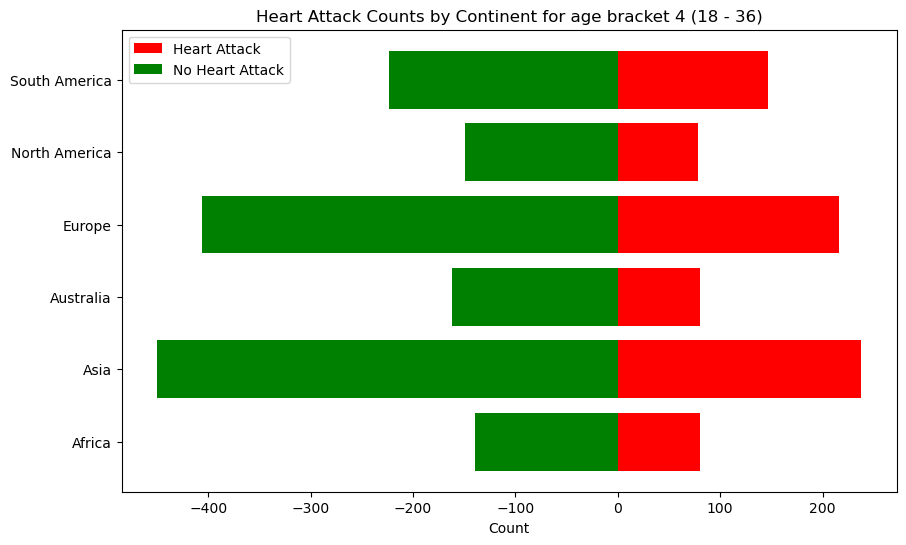

In [25]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data102 = result1102[result1102['Heart Attack Risk'] == 1]
no_heart_attack_data102 = result1102[result1102['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts102 = heart_attack_data102['Continent'].value_counts().sort_index()
no_heart_attack_counts102 = no_heart_attack_data102['Continent'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts102.index, heart_attack_counts102, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts102.index, -no_heart_attack_counts102, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Continent for age bracket 4 (18 - 36)')
ax.legend()

plt.show()

The graph above shows the number of patients in each continent, between ages 18 and 36 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all continents, there are more people without a risk of heart attack than there are in this age bracket.

2, Europe and Asia lead other countries, both in terms of people within the ages 18 and 36 that have a high risk of a heart attack and also in terms of people within the ages 18 and 36 that have a low risk of a heart attack.

<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 2</span>

In [26]:
#filtering the dataset to a specific age bracket
AgeBracket2102 = df102['AgeBracket'] == '(37 - 54)'

selected_columns = ['Heart Attack Risk', 'Continent',]

#Applying the filter and selecting specific columns
result2102 = df102.loc[AgeBracket2102, selected_columns]

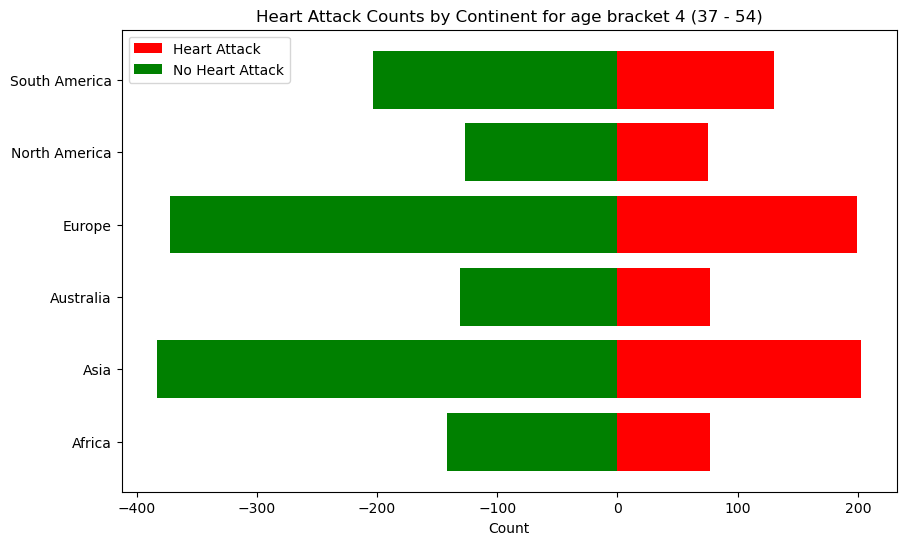

In [27]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data2102 = result2102[result2102['Heart Attack Risk'] == 1]
no_heart_attack_data2102 = result2102[result2102['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts2102 = heart_attack_data2102['Continent'].value_counts().sort_index()
no_heart_attack_counts2102 = no_heart_attack_data2102['Continent'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts2102.index, heart_attack_counts2102, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts2102.index, -no_heart_attack_counts2102, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Continent for age bracket 4 (37 - 54)')
ax.legend()

plt.show()

The graph above shows the number of patients in each continent, between ages 37 and 54 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all continents, there are more people without a risk of heart attack than there are in this age bracket.

2, Similar with the results from the previous graph, Europe and Asia lead other countries, both in terms of people within the ages 37 and 54 that have a high risk of a heart attack and also in terms of people within the ages 37 and 54 that have a low risk of a heart attack. South America becomes more prominent here also in terms of both patients with and without a high change of getting a heart attack.

<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 3</span>

In [28]:
#filtering the dataset to a specific age bracket
AgeBracket3102 = df102['AgeBracket'] == '(55 - 72)'

selected_columns = ['Heart Attack Risk', 'Continent',]

#Applying the filter and selecting specific columns
result3102 = df102.loc[AgeBracket3102, selected_columns]

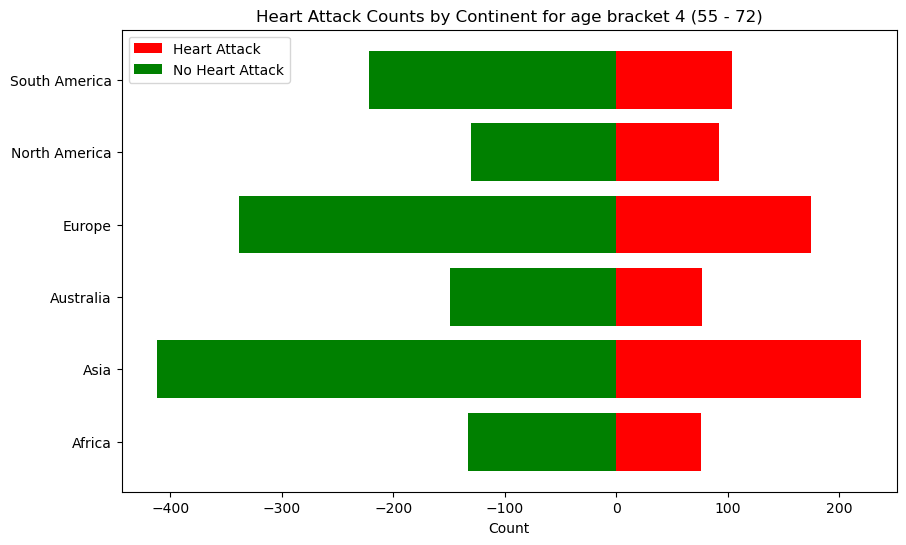

In [29]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data3102 = result3102[result3102['Heart Attack Risk'] == 1]
no_heart_attack_data3102 = result3102[result3102['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts3102 = heart_attack_data3102['Continent'].value_counts().sort_index()
no_heart_attack_counts3102 = no_heart_attack_data3102['Continent'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts3102.index, heart_attack_counts3102, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts3102.index, -no_heart_attack_counts3102, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Continent for age bracket 4 (55 - 72)')
ax.legend()

plt.show()

The graph above shows the number of patients in each continent, between ages 55 and 72 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all continents, there are more people without a risk of heart attack than there are in this age bracket.

2, Similar with the results from the previous 2 graphs, Europe and Asia lead other countries, both in terms of people within the ages 55 and 72 that have a high risk of a heart attack and also in terms of people within the ages 55 and 72 that have a low risk of a heart attack.

<span style="font-size: 18px; text-align: center; color: blue">Age Bracket 4</span>

In [30]:
#filtering the dataset to a specific age bracket
AgeBracket4102 = df102['AgeBracket'] == '(73 - 90)'

selected_columns = ['Heart Attack Risk', 'Continent',]

#Applying the filter and selecting specific columns
result4102 = df102.loc[AgeBracket4102, selected_columns]

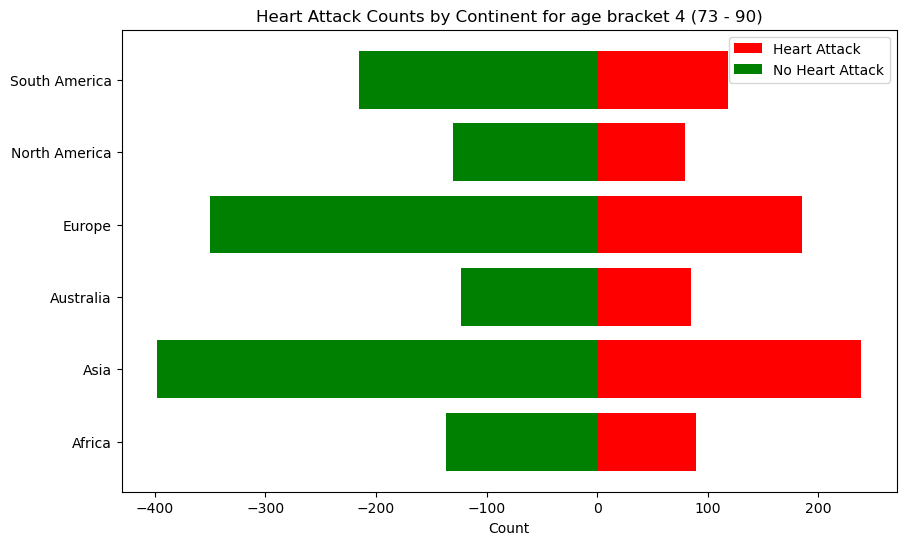

In [31]:
#visualization
#Separating the data into two subsets: patients with heart attack, and patients without heart attack
heart_attack_data4102 = result4102[result4102['Heart Attack Risk'] == 1]
no_heart_attack_data4102 = result4102[result4102['Heart Attack Risk'] == 0]

#Calculating counts for each group
heart_attack_counts4102 = heart_attack_data4102['Continent'].value_counts().sort_index()
no_heart_attack_counts4102 = no_heart_attack_data4102['Continent'].value_counts().sort_index()

#Creating a mirrored pyramid plot
fig, ax = plt.subplots(figsize=(10, 6))

#Heart Attack side
ax.barh(heart_attack_counts4102.index, heart_attack_counts4102, color='red', label='Heart Attack')

#No Heart Attack side (mirrored)
ax.barh(no_heart_attack_counts4102.index, -no_heart_attack_counts4102, color='green', label='No Heart Attack')

#Adding labels and title
ax.set_xlabel('Count')
ax.set_title('Heart Attack Counts by Continent for age bracket 4 (73 - 90)')
ax.legend()

plt.show()

The graph above shows the number of patients in each continent, between ages 73 and 90 who have a high risk of heart attack.
Visualizing the data shoes that:

1, In all continents, there are more people without a risk of heart attack than there are in this age bracket.

2, Similar with the results from the previous 3 graphs, Europe and Asia lead other countries, both in terms of people within the ages 73 and 90 that have a high risk of a heart attack and also in terms of people within the ages 73 and 90 that have a low risk of a heart attack.


At this point, merging the data to see what contintent has the highest number of patients having high risks of heart attack must be quite predictable.
Let's see...

In [32]:
#filter just positives
filtered_df1102 = result1102[result1102['Heart Attack Risk'] == 1]
filtered_df2102 = result2102[result2102['Heart Attack Risk'] == 1]
filtered_df3102 = result3102[result3102['Heart Attack Risk'] == 1]
filtered_df4102 = result4102[result4102['Heart Attack Risk'] == 1]

In [33]:
#combine all data
combined_df102 = pd.concat([filtered_df1102, filtered_df2102, filtered_df3102, filtered_df4102], ignore_index=True)

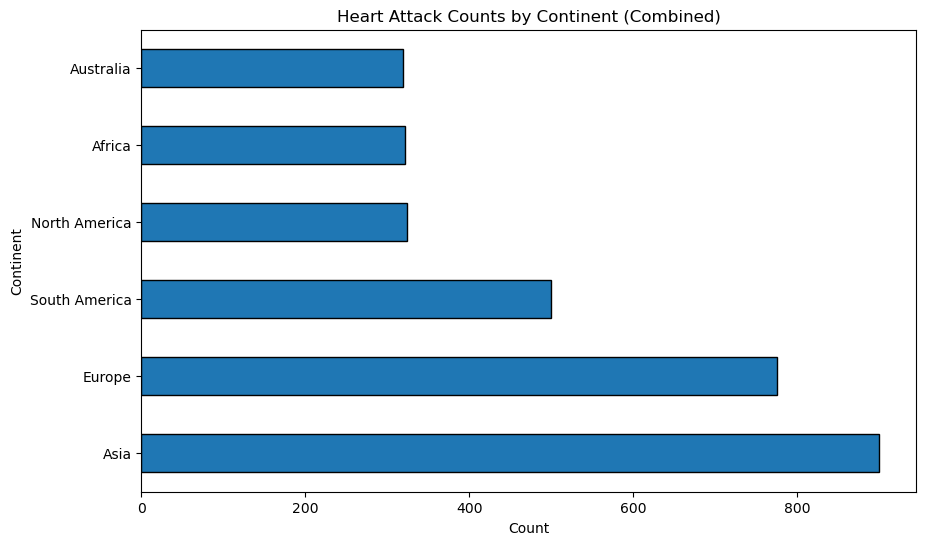

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
combined_df102['Continent'].value_counts().plot(kind='barh', ax=ax, edgecolor='black')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Continent')
ax.set_title('Heart Attack Counts by Continent (Combined)')

plt.show()

The bar chart above clearly show that as anticipated, Asia and Europe has the highest number of patients having a high risk of heart attack compared to other continents.

Comparing this information with the results we got when we visualized the countries having a high risk of a heart attack shows the concentration of patients with high risk of heart attack in different continents.
Nigera might have been the country with the highest number of patients with a risk of heart attack based on the data, but Africa comes second to last in terms of the continents that have the highest number of patients with a risk of heart attack.

A reason for Asia and Europe being top of this list may be because of the number of Asian and European countries in the data.



INTERESTING!!!

<span style="font-size: 40px; text-align: center; font-weight: bold">PART 2</span>

Part 2 analyzes an article written by St. Luke’s Health in 2019 on ‘10 things that increase your risk of a heart attack’. The article discusses various risk factors associated with heart attacks and provides insights into how individuals can reduce their risk. The risk factors it mentions are older age, gender, heredity, smoking, high blood pressure, physical inactivity, obesity, diabetes and stress.

My analysis would cover 5 of the risk factors(older age, gender, smoking, being physically inactive, and being stressed) mentioned in St. Luke's Health article to show the accuracy of the article based on our dataset.

<span style="font-size: 25px; text-align: center;">Question 1:</span>

<span style="font-size: 25px; text-align: center;">What age brackets are at risk of having a heart attack?</span>

In [35]:
#filtering the dataset
filtered_df210 = df[df['Heart Attack Risk'] == 1]

In [36]:
age_bracket_counts = filtered_df210['AgeBracket'].value_counts()

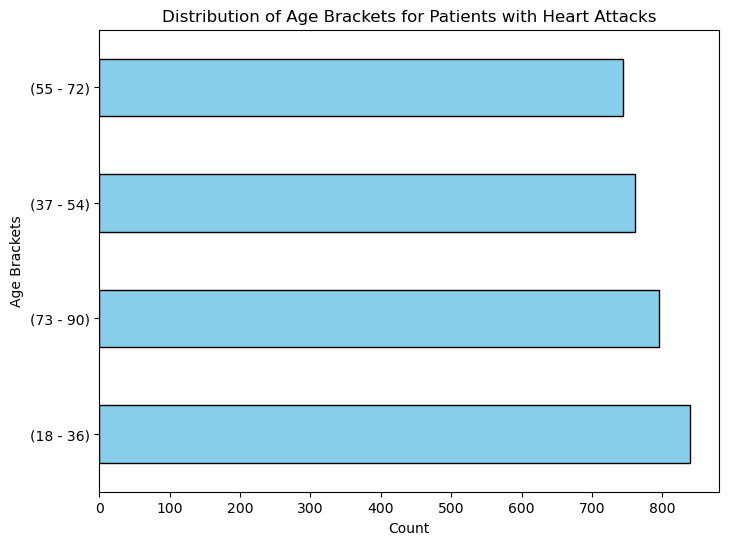

In [37]:
#Plotting the value counts on a bar chart
plt.figure(figsize=(8, 6))
age_bracket_counts.plot(kind='barh', edgecolor='black', color='skyblue')

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('Age Brackets')
plt.title('Distribution of Age Brackets for Patients with Heart Attacks')

plt.show()

This bar chart show us that based on our dataset, age is not really a factor for patients to have a high risk of getting a heart attack. 

There may be many other reasons combined with age that makes patients have a high risk of getting a heart attack, but age alone is not a factor based on our dataset.

<span style="font-size: 25px; text-align: center;">Question 2:</span>

<span style="font-size: 25px; text-align: center;">What gender is liable to a higher risk of heart attack?</span>

In [38]:
gender_counts = filtered_df210['Sex'].value_counts()

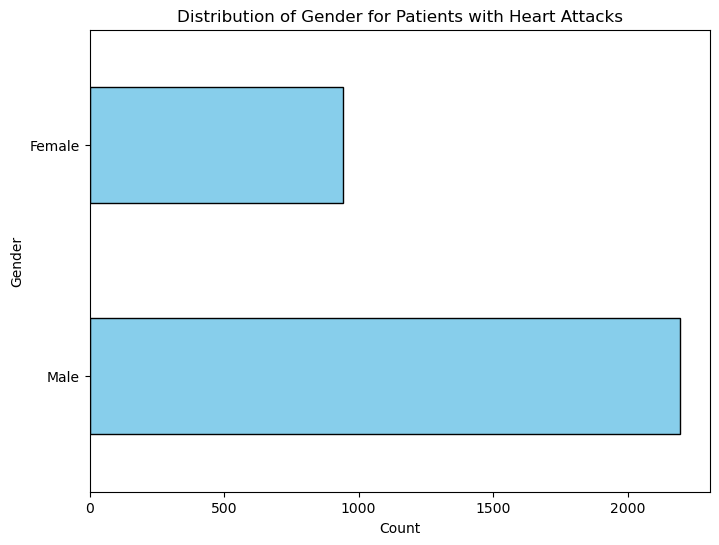

In [39]:
#Plotting the value counts on a bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='barh', edgecolor='black', color='skyblue')

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Distribution of Gender for Patients with Heart Attacks')

plt.show()

This bar chart shows that in our dataset, male patients have a higher risk of getting a heart attack comapred to femalte patients.

This is in line with what is said in the article.

<span style="font-size: 25px; text-align: center;">Question 3:</span>

<span style="font-size: 25px; text-align: center;">Is smoking a factor for higher risk of heart attack?</span>

In [41]:
smoking_counts = filtered_df210['Smoking'].value_counts()

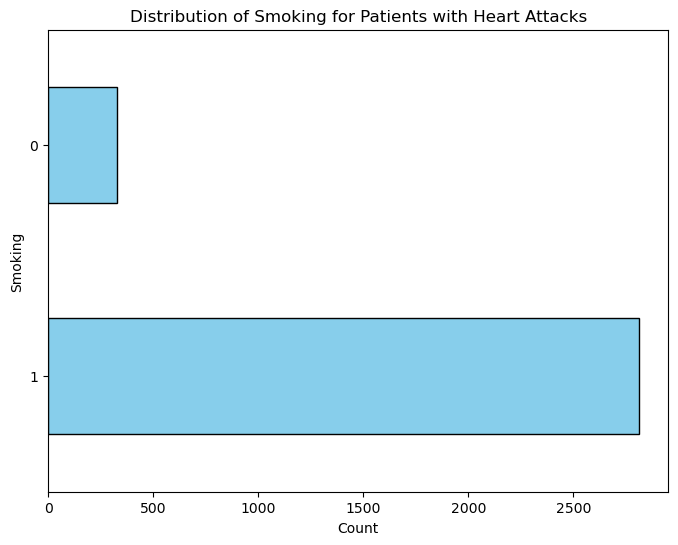

In [42]:
#Plotting the value counts on a bar chart
plt.figure(figsize=(8, 6))
smoking_counts.plot(kind='barh', edgecolor='black', color='skyblue')

#Adding labels and title
plt.xlabel('Count')
plt.ylabel('Smoking')
plt.title('Distribution of Smoking for Patients with Heart Attacks')

plt.show()

The article says that one out of five deaths from a heart attack is due to smoking. Our data set clearly shows that patients who smoke are more likely to get a heart attack compared to patients who do not smoke.

<span style="font-size: 25px; text-align: center;">Question 4:</span>

<span style="font-size: 25px; text-align: center;">Does being physically inactive increase your risk of having a heart attack?:</span>

In [43]:
physically_inactive = filtered_df210['Sedentary Hours Per Day'].round().value_counts()

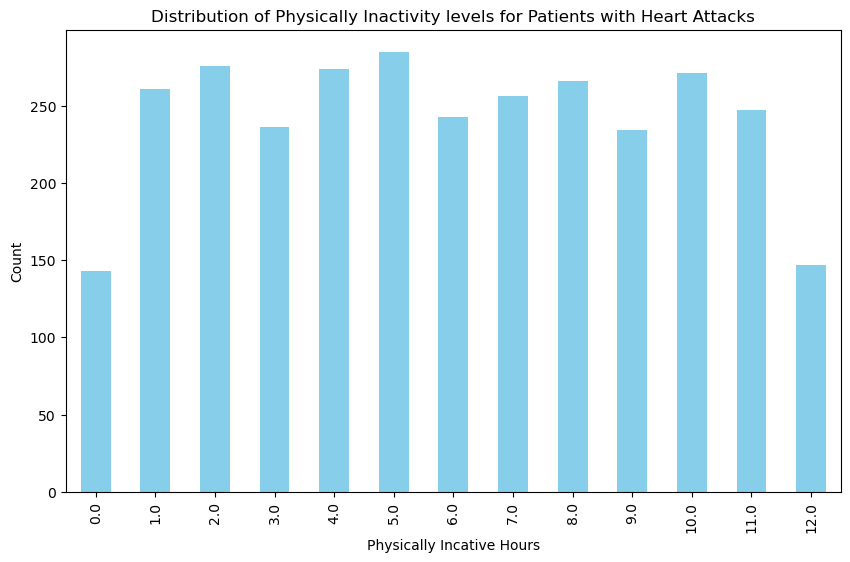

In [44]:
#Plotting the value counts on a bar chart
physically_inactive_sorted = physically_inactive.sort_index()

plt.figure(figsize=(10, 6))
physically_inactive_sorted.plot(kind='bar', color='skyblue')

#Adding labels and title
plt.xlabel('Physically Incative Hours')
plt.ylabel('Count')
plt.title('Distribution of Physically Inactivity levels for Patients with Heart Attacks')
plt.xticks(rotation=90,)

plt.show()

St. Lukes Health article says that "Lack of physical activity can lead to many problems, including heart disease."

However, our dataset says other wise. Here, we do not see the effect that being active or not has on a patient's risk of getting a heart attack. The number of patients who have 0 physical inactive hours has the same count with the number of patients who have 12 hours of being physically inactive.

This makes it evident that there are other factors that affect the risk of patients having a high risk of a heart attack.
It would be interesting to find out what those other factors are...

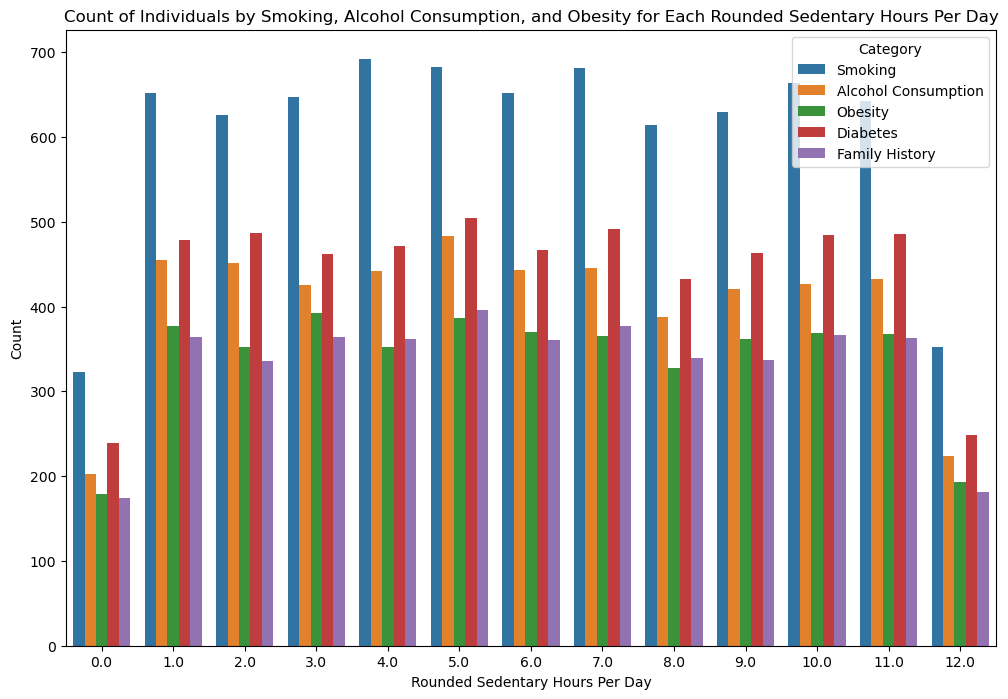

In [45]:
import seaborn as sns

df['Sedentary Hours Per Day'] = df['Sedentary Hours Per Day'].round()

#Groupping by rounded sedentary hours and calculating the count for each category
grouped_data = df.groupby('Sedentary Hours Per Day')[['Smoking', 'Alcohol Consumption', 'Obesity', 'Diabetes', 'Family History']].sum().reset_index()

#Melting the DataFrame for easier plotting
melted_data = pd.melt(grouped_data, id_vars='Sedentary Hours Per Day', var_name='Category', value_name='Count')

#Creating a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Sedentary Hours Per Day', y='Count', hue='Category', data=melted_data)

#Customizing the plot
plt.title('Count of Individuals by Smoking, Alcohol Consumption, and Obesity for Each Rounded Sedentary Hours Per Day')
plt.xlabel('Rounded Sedentary Hours Per Day')
plt.ylabel('Count')
plt.show()

This bar chart shows the other factors that have patients with varying physically active hours have a higher chance of a heart attack. 

Here, we see that based on our previous finding and in line with what the article says, smoking is a huge factor for a patient to have a high risk of a heart attack, regardless of their number of physically active hours per day.
The second biggest factor for all patients with varying physically inactive hours per day is Diabetes.
The third factor is a patient's alcohol consumption.

The fourth and fifth factor changes between Obesity and Heredity.

<span style="font-size: 25px; text-align: center;">Question 5:</span>

<span style="font-size: 25px; text-align: center;">Is being stressed a factor for higher risk of heart attack?</span>

In [46]:
stress_levels = filtered_df210['Stress Level'].value_counts()

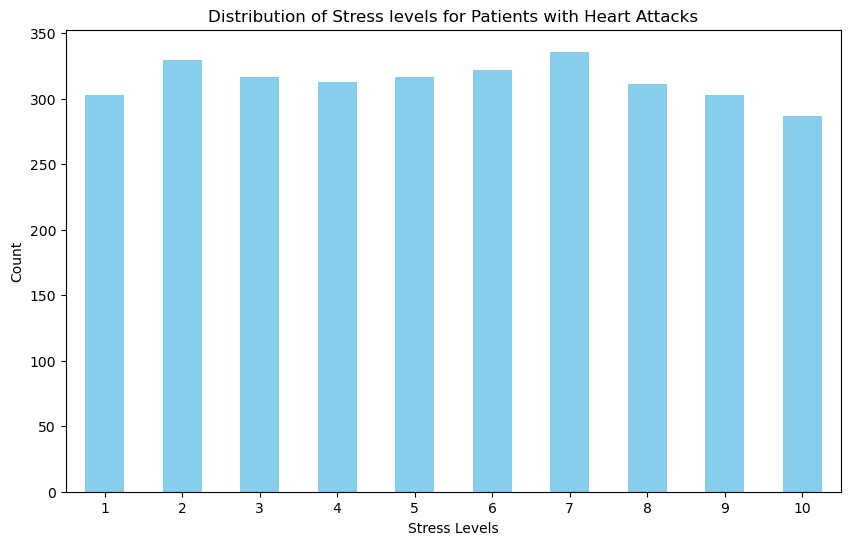

In [47]:
#Plotting the value counts on a bar chart
stress_levels_sorted = stress_levels.sort_index()

plt.figure(figsize=(10, 6))
stress_levels_sorted.plot(kind='bar', color='skyblue')

#Adding labels and title
plt.xlabel('Stress Levels')
plt.ylabel('Count')
plt.title('Distribution of Stress levels for Patients with Heart Attacks')
plt.xticks(rotation=0,)

plt.show()

Similar to what we see for physically inactive hours, we do not see the effect that being stressed or not has on a patient's risk of getting a heart attack or not.

This also makes it evident that there are other factors that affect the risk of patients having a high risk of a heart attack.
It would be interesting to find out what those other factors are...

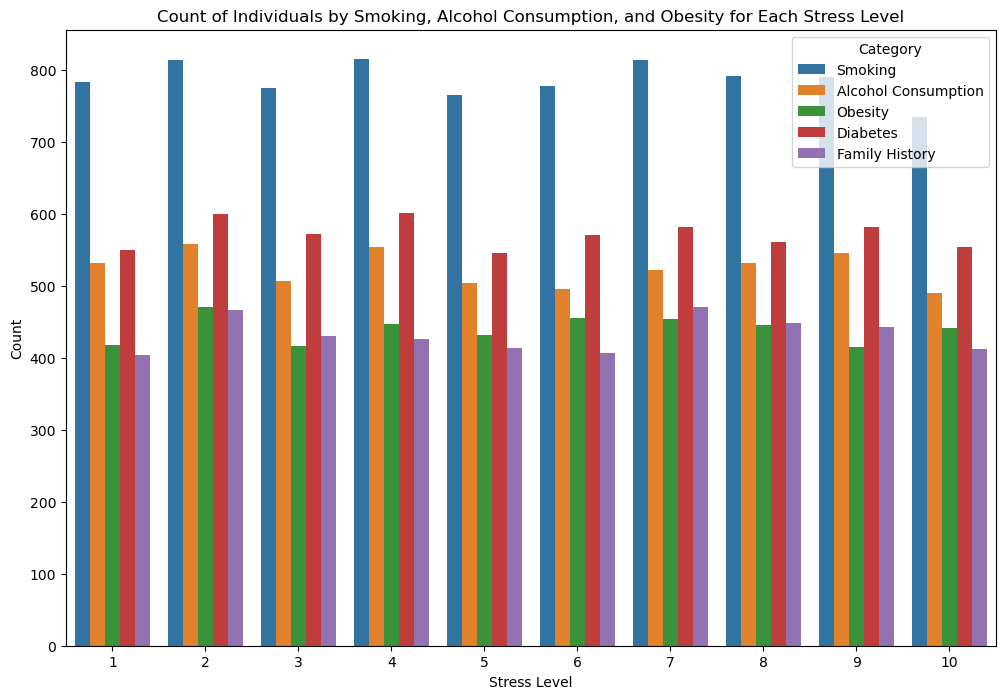

In [48]:
#No. rounding for Stress Level
df['Stress Level'] = df['Stress Level']

#Grouping by stress level and calculating the count for each category
grouped_data = df.groupby('Stress Level')[['Smoking', 'Alcohol Consumption', 'Obesity', 'Diabetes', 'Family History']].sum().reset_index()

#Melting the DataFrame for easier plotting
melted_data = pd.melt(grouped_data, id_vars='Stress Level', var_name='Category', value_name='Count')

#Creating a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Stress Level', y='Count', hue='Category', data=melted_data)

#Customizing the plot
plt.title('Count of Individuals by Smoking, Alcohol Consumption, and Obesity for Each Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

This bar chart shows the other factors that patients with varying stress levels have of a higher chance of a heart attack. 

Here, we see that based on our previous finding and in line with what the article says, smoking is a huge factor for a patient to have a high risk of a heart attack, regardless of their stress levels.
The second biggest factor for all patients with varying physically inactive hours per day is Diabetes.
The third factor is a patient's alcohol consumption.

The fourth and fifth factor changes between Obesity and Heredity.

<span style="font-size: 30px; text-align: center;">GROUPING</span>

In [50]:
grouped = df[df['Heart Attack Risk'] == 1].groupby(['AgeBracket', 'Sex', 'Smoking']).size().unstack()

Text(0, 0.5, 'Frequency')

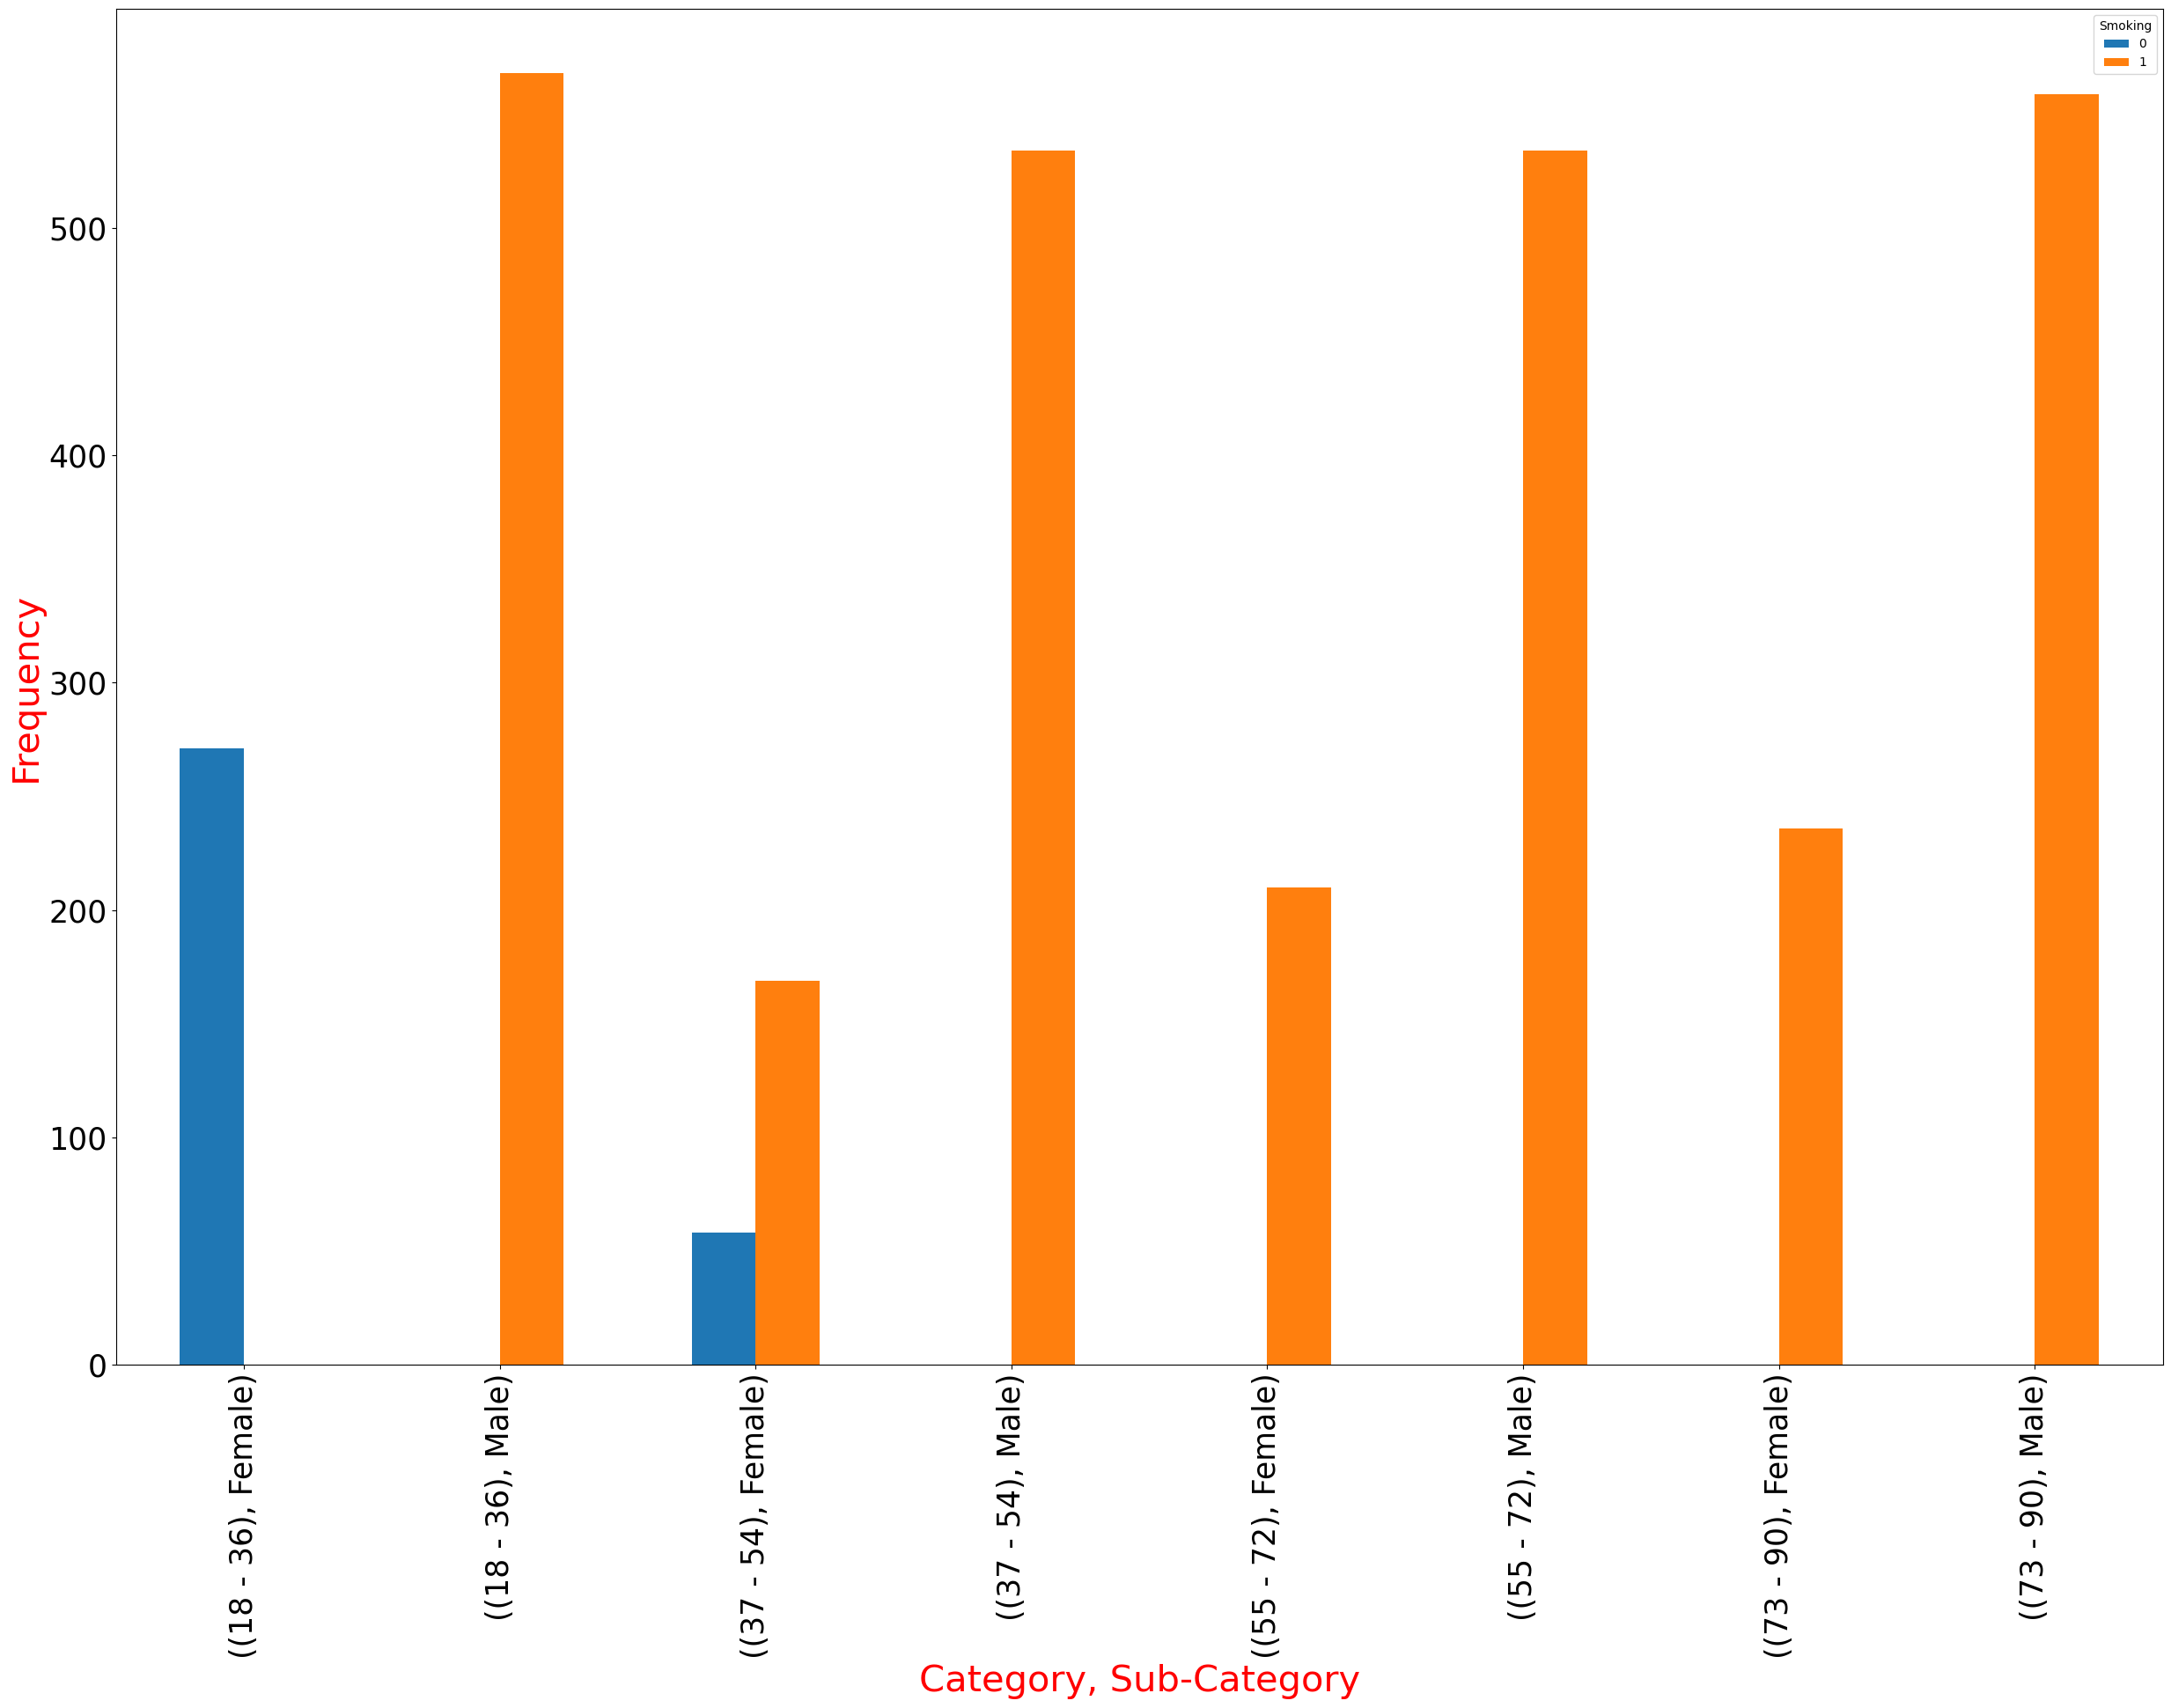

In [51]:
#visualizing data on a bar chart
grouped.plot(kind = 'bar', figsize = (30, 20), fontsize = 25)
plt.xticks(rotation=90,)
plt.xlabel('Category, Sub-Category', fontsize=30, color='red') 
plt.ylabel('Frequency', fontsize=30, color='red')

The above graph shows visualisations of more interesting groupings.
Being that smoking is a high determinant of patients having heart attacks, we might want to know what gender and what age brackets have the highest number of patients that smoke.